In [1]:
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#train file
train_file= pd.read_csv('C:/Users/HOME/dacon/train.csv')
train_file.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [3]:
#test file
test_file= pd.read_csv('C:/Users/HOME/dacon/test.csv')
test_file.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [4]:
#age_gender_info
age_gender_info= pd.read_csv('C:/Users/HOME/dacon/age_gender_info.csv')
age_gender_info.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [5]:
train_file

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [6]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [7]:
train_file.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [8]:
subway=train_file[train_file['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]
subway

#subway라는 datafram에다가 지하철 결측치 있는 행들 저장하기

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,C1350,1401,아파트,대전광역시,공공임대(10년),59.91,13,2.0,A,37474000,519350,NaN,6.0,1636.0,2315.0
2340,C1350,1401,아파트,대전광역시,공공임대(10년),59.92,223,2.0,A,37385000,516130,NaN,6.0,1636.0,2315.0
2341,C1350,1401,아파트,대전광역시,공공임대(분납),51.99,146,2.0,A,54612000,131130,NaN,6.0,1636.0,2315.0
2342,C1350,1401,아파트,대전광역시,공공임대(분납),59.91,32,2.0,A,63585000,152680,NaN,6.0,1636.0,2315.0


In [9]:
C1312 = train_file['단지코드']=='C1312'
c_C1312 = train_file[C1312]
c_C1312

#C1312의 전체를 뽑아봤더니 지하철 값은 전체가 다 NAN이었음. 따라서 0으로 지하철 값을 채우기로 결정!!!!

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0


In [10]:
C1874 = train_file['단지코드']=='C1874'
c_C1874 = train_file[C1874]
c_C1874

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
99,C1874,619,아파트,충청남도,영구임대,26.37,149,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
100,C1874,619,아파트,충청남도,영구임대,31.32,149,2.0,C,3731000,83020,NaN,2.0,97.0,62.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
103,C1874,619,상가,충청남도,임대상가,17.40,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,22.89,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
105,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
106,C1874,619,상가,충청남도,임대상가,23.13,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
107,C1874,619,상가,충청남도,임대상가,23.25,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0


### C1312의 전체를 뽑아봤더니 지하철 값은 전체가 다 NAN이었음. 따라서 0으로 지하철 값을 채우기로 결정!!!!

In [11]:
train_file['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].replace(np.nan,0,inplace=True)

In [12]:
train_file.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

### 임대보증금, 임대료 채우기

In [13]:
hipen = train_file['임대보증금']=='-'
hi = train_file[hipen]
hi

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [14]:
# '-' 값을 Nan으로 바꿔준다.
train_file['임대보증금'].replace('-',np.nan,inplace=True)

In [15]:
oo = train_file['임대료']=='-'
oo_hi = train_file[oo]
oo_hi

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2043,C1397,370,아파트,서울특별시,장기전세,23.32,51,9.0,A,87444000,-,0.0,3.0,1590.0,1595.0
2044,C1397,370,아파트,서울특별시,장기전세,46.79,4,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2045,C1397,370,아파트,서울특별시,장기전세,46.91,69,9.0,A,174888000,-,0.0,3.0,1590.0,1595.0
2046,C1397,370,아파트,서울특별시,장기전세,51.96,24,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2047,C1397,370,아파트,서울특별시,장기전세,51.99,80,9.0,A,194562000,-,0.0,3.0,1590.0,1595.0
2048,C1397,370,아파트,서울특별시,장기전세,59.93,142,9.0,A,216423000,-,0.0,3.0,1590.0,1595.0
2100,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000,-,0.0,3.0,673.0,645.0
2101,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2102,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000,-,0.0,3.0,673.0,645.0
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,NaN,-,0.0,4.0,1670.0,1153.0


In [16]:
#임대료를 Nan으로 바꿔준다.
train_file['임대료'].replace('-',np.nan,inplace=True)

In [17]:
train_file.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [18]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   object 
 10  임대료                           2362 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2952 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [19]:
Money=train_file[train_file['임대보증금'].isnull()]
Money

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [20]:
C1925 = train_file['단지코드']=='C1925'
c_C1925 = train_file[C1925]
c_C1925

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
86,C1925,601,아파트,강원도,영구임대,26.37,298,9.0,C,8052000,130850,0.0,4.0,117.0,75.0
87,C1925,601,아파트,강원도,영구임대,31.32,298,9.0,C,9174000,144460,0.0,4.0,117.0,75.0
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0


In [21]:
train_file['임대보증금']=train_file['임대보증금'].astype(float)
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2362 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2952 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [22]:
train_file['임대료']=train_file['임대료'].astype(float)
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2371 non-null   float64
 10  임대료                           2362 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2952 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

### 진행상황 : 임대보증금, 임대료의 '-'값을 Nan값으로 바꿔줌

In [23]:
train_file.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             590
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [24]:
S=train_file[train_file['임대건물구분'].isnull()]
Money

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [25]:
money=train_file[train_file['임대보증금'].isnull()]
money

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,0.0,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0
2907,C2186,924,아파트,대구광역시,국민임대,29.34,38,0.0,H,NaN,NaN,0.0,8.0,664.0,744.0


In [26]:
C1925 = train_file['단지코드']=='C1925'
c_C1925 = train_file[C1925]
c_C1925

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
86,C1925,601,아파트,강원도,영구임대,26.37,298,9.0,C,8052000.0,130850.0,0.0,4.0,117.0,75.0
87,C1925,601,아파트,강원도,영구임대,31.32,298,9.0,C,9174000.0,144460.0,0.0,4.0,117.0,75.0
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0


In [27]:
train_file['임대건물구분'].value_counts()

아파트    2390
상가      562
Name: 임대건물구분, dtype: int64

In [28]:
train_file['공급유형'].value_counts()

국민임대         1758
임대상가          562
행복주택          213
공공임대(10년)     205
영구임대          152
공공임대(50년)      31
공공임대(분납)       12
장기전세            9
공공분양            7
공공임대(5년)        3
Name: 공급유형, dtype: int64

In [29]:
train_file['자격유형'].value_counts()

A    1801
D     569
H     155
J     114
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [30]:
train_file['단지코드'].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C1519     2
C2437     1
C2188     1
C2520     1
C2340     1
Name: 단지코드, Length: 423, dtype: int64

In [31]:
train_file['지역'].value_counts()

경기도        621
경상남도       369
부산광역시      328
대전광역시      266
강원도        187
충청북도       163
충청남도       158
전라남도       151
광주광역시      141
경상북도       119
전라북도       109
대구광역시      102
제주특별자치도     91
서울특별시       64
세종특별자치시     47
울산광역시       36
Name: 지역, dtype: int64

### 단지코드 별로 DataFrame 만들기

In [32]:
C2483 = train_file['단지코드']=='C2483'
c_C2483 = train_file[C2483]
c_C2483

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
5,C2483,900,아파트,경상북도,국민임대,51.95,89,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
6,C2483,900,아파트,경상북도,국민임대,51.95,135,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
7,C2483,900,아파트,경상북도,국민임대,59.88,86,38.0,A,30357000.0,214270.0,0.0,3.0,1425.0,1015.0


### 오류 2번, 3번 단지코드 삭제. C2085 C1397 C2431 C1649 C1036 C1095 C2051 C1218 C1894 C2483 C1502 C1988

In [33]:
#단지코드를 인덱스로 만들어 봅시다.
train_file = train_file.set_index('단지코드')
train_file

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [34]:
#오류 단지코드 삭제.
train_file = train_file.drop(['C2085','C1397','C2431','C1649','C1036','C1095','C2051','C1218','C1894','C2483','C1502','C1988'])
train_file

,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,,,,,,,,,,,,,,
C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [35]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2869 entries, C2515 to C2532
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   총세대수                          2869 non-null   int64  
 1   임대건물구분                        2869 non-null   object 
 2   지역                            2869 non-null   object 
 3   공급유형                          2869 non-null   object 
 4   전용면적                          2869 non-null   float64
 5   전용면적별세대수                      2869 non-null   int64  
 6   공가수                           2869 non-null   float64
 7   자격유형                          2869 non-null   object 
 8   임대보증금                         2288 non-null   float64
 9   임대료                           2285 non-null   float64
 10  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2869 non-null   float64
 11  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 12  단지내주차면수                       2869 non-null   float64
 13  등록차

In [36]:
#단지코드를 다시열로 바꾸기
train_file = train_file.reset_index().rename(columns={'index':'단지코드'})
train_file

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000.0,116090.0,0.0,1.0,166.0,146.0
2865,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2866,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0
2867,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000.0,142310.0,0.0,1.0,166.0,146.0


In [37]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2869 non-null   object 
 1   총세대수                          2869 non-null   int64  
 2   임대건물구분                        2869 non-null   object 
 3   지역                            2869 non-null   object 
 4   공급유형                          2869 non-null   object 
 5   전용면적                          2869 non-null   float64
 6   전용면적별세대수                      2869 non-null   int64  
 7   공가수                           2869 non-null   float64
 8   자격유형                          2869 non-null   object 
 9   임대보증금                         2288 non-null   float64
 10  임대료                           2285 non-null   float64
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2869 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2869 non-null   float64
 13  단지내

In [38]:
train_file.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             584
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [39]:
train_file['단지코드'].value_counts()

C1439    48
C2132    47
C1859    40
C1790    33
C2597    32
         ..
C1234     2
C2520     1
C2340     1
C2188     1
C2437     1
Name: 단지코드, Length: 411, dtype: int64

### 임대 보증금과 임대료

In [40]:
train_file.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           581
임대료                             584
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

#### 자격유형을 가지고 임대료와 임대보증금을 채워볼까

In [41]:
train_file['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [42]:
train_file.sort_values(by='자격유형', inplace=True, kind='quicksort')

In [43]:
#인덱스 초기화
train_file = train_file.reset_index(drop=True)
train_file

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2515,545,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0
1,C2325,378,아파트,전라북도,국민임대,51.91,57,3.0,A,17342000.0,96610.0,0.0,1.0,265.0,293.0
2,C2325,378,아파트,전라북도,국민임대,51.91,27,3.0,A,17342000.0,96610.0,0.0,1.0,265.0,293.0
3,C2394,277,아파트,충청남도,국민임대,39.59,56,20.0,A,13007000.0,111470.0,0.0,2.0,222.0,254.0
4,C2394,277,아파트,충청남도,국민임대,39.63,15,20.0,A,13007000.0,111470.0,0.0,2.0,222.0,254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2446,2200,아파트,경기도,행복주택,26.66,44,32.0,N,39520000.0,164660.0,0.0,5.0,1570.0,1204.0
2865,C2570,450,아파트,전라남도,행복주택,21.43,160,14.0,N,12920000.0,71000.0,0.0,2.0,318.0,205.0
2866,C1659,902,아파트,광주광역시,행복주택,26.54,18,32.0,N,23370000.0,132430.0,0.0,2.0,635.0,416.0
2867,C2570,450,아파트,전라남도,행복주택,26.60,36,14.0,N,15580000.0,85000.0,0.0,2.0,318.0,205.0


In [44]:
train_file.loc[train_file['자격유형'] == 'H']

# #A,B,C,E,F,G,H,I,J,K,L,M,N,O는 Nan값 없음
# D 아예 없음
# K 는 중감중간 없음

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2463,C2361,1174,아파트,경기도,국민임대,39.72,76,9.0,H,23720000.0,197230.0,0.0,4.0,1026.0,1117.0
2464,C2001,540,아파트,경기도,국민임대,26.91,18,10.0,H,9110000.0,122000.0,0.0,8.0,500.0,417.0
2465,C2556,303,아파트,울산광역시,국민임대,36.40,216,21.0,H,7200000.0,119000.0,0.0,2.0,249.0,148.0
2466,C2531,540,아파트,제주특별자치도,국민임대,46.27,96,22.0,H,24948000.0,243000.0,0.0,6.0,397.0,358.0
2467,C2531,540,아파트,제주특별자치도,국민임대,29.26,30,22.0,H,9171000.0,141000.0,0.0,6.0,397.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,C1677,1144,아파트,경기도,국민임대,46.70,140,9.0,H,36242000.0,301540.0,0.0,4.0,1039.0,1101.0
2614,C2453,659,아파트,경기도,국민임대,26.98,230,7.0,H,18488000.0,170720.0,2.0,3.0,573.0,559.0
2615,C1045,464,아파트,강원도,국민임대,26.44,76,13.0,H,8700000.0,113000.0,0.0,2.0,288.0,266.0
2616,C2453,659,아파트,경기도,국민임대,45.71,130,7.0,H,52237000.0,302930.0,2.0,3.0,573.0,559.0


In [45]:
k_train = train_file.loc[train_file['자격유형'] == 'K']
k_train

#자격 유형 K만 뽑아낸걸 보기 쉽게 하기 위해서 k_train이라는 dataframe에 따로 저장

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2770,C1156,1004,아파트,충청북도,행복주택,26.49,52,47.0,K,67718000.0,35270.0,0.0,3.0,700.0,505.0
2771,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2772,C1156,1004,아파트,충청북도,행복주택,36.53,128,47.0,K,91414000.0,47600.0,0.0,3.0,700.0,505.0
2773,C1156,1004,아파트,충청북도,행복주택,36.53,256,47.0,K,91414000.0,47600.0,0.0,3.0,700.0,505.0
2774,C1156,1004,아파트,충청북도,행복주택,26.62,88,47.0,K,67718000.0,35270.0,0.0,3.0,700.0,505.0
2775,C1156,1004,아파트,충청북도,행복주택,26.51,10,47.0,K,68963000.0,35910.0,0.0,3.0,700.0,505.0
2776,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2777,C1156,1004,아파트,충청북도,행복주택,26.51,58,47.0,K,67718000.0,35270.0,0.0,3.0,700.0,505.0
2778,C1156,1004,아파트,충청북도,행복주택,16.64,224,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2779,C1156,1004,아파트,충청북도,행복주택,16.64,182,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0


In [46]:
k_train.sort_values(by='전용면적', inplace=True, kind='quicksort')
k_train

#전용면적으로 정렬

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2800,C2225,1206,아파트,경상남도,행복주택,16.02,120,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0
2780,C2225,1206,아파트,경상남도,행복주택,16.27,44,49.0,K,32758000.0,17060.0,0.0,3.0,842.0,448.0
2797,C2225,1206,아파트,경상남도,행복주택,16.29,340,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0
2778,C1156,1004,아파트,충청북도,행복주택,16.64,224,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2779,C1156,1004,아파트,충청북도,행복주택,16.64,182,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2782,C2245,212,아파트,경상남도,행복주택,16.71,67,22.0,K,34499000.0,17960.0,0.0,1.0,114.0,98.0
2783,C2245,212,아파트,경상남도,행복주택,16.71,5,22.0,K,33216000.0,17300.0,0.0,1.0,114.0,98.0
2776,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,NaN,NaN,0.0,3.0,338.0,345.0
2790,C1685,295,아파트,충청북도,행복주택,26.04,38,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2789,C1685,295,아파트,충청북도,행복주택,26.04,49,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0


In [47]:
#그냥 일단 앞의 내용으로 채웁시다.
k_train['임대보증금'].fillna(method='pad',inplace=True)
k_train['임대료'].fillna(method='pad',inplace=True)
k_train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2800,C2225,1206,아파트,경상남도,행복주택,16.02,120,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0
2780,C2225,1206,아파트,경상남도,행복주택,16.27,44,49.0,K,32758000.0,17060.0,0.0,3.0,842.0,448.0
2797,C2225,1206,아파트,경상남도,행복주택,16.29,340,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0
2778,C1156,1004,아파트,충청북도,행복주택,16.64,224,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2779,C1156,1004,아파트,충청북도,행복주택,16.64,182,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2782,C2245,212,아파트,경상남도,행복주택,16.71,67,22.0,K,34499000.0,17960.0,0.0,1.0,114.0,98.0
2783,C2245,212,아파트,경상남도,행복주택,16.71,5,22.0,K,33216000.0,17300.0,0.0,1.0,114.0,98.0
2776,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,33216000.0,17300.0,0.0,3.0,338.0,345.0
2790,C1685,295,아파트,충청북도,행복주택,26.04,38,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2789,C1685,295,아파트,충청북도,행복주택,26.04,49,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0


In [67]:
#원래 데이터 프레임에서 k와 관련된 행을 다 삭제함. (k_train을 다시 연결하기 위해서)
indexName = train_file[train_file['자격유형']=='K'].index
train_file.drop(indexName, inplace = True)

In [69]:
train_file['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [96]:
#train_file + k_train = train
train = pd.concat([train_file, k_train])

In [97]:
train['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [98]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           577
임대료                             580
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [99]:
train.loc[train['자격유형'] == 'K']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2800,C2225,1206,아파트,경상남도,행복주택,16.02,120,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0
2780,C2225,1206,아파트,경상남도,행복주택,16.27,44,49.0,K,32758000.0,17060.0,0.0,3.0,842.0,448.0
2797,C2225,1206,아파트,경상남도,행복주택,16.29,340,49.0,K,33888000.0,17650.0,0.0,3.0,842.0,448.0
2778,C1156,1004,아파트,충청북도,행복주택,16.64,224,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2779,C1156,1004,아파트,충청북도,행복주택,16.64,182,47.0,K,42913000.0,22350.0,0.0,3.0,700.0,505.0
2782,C2245,212,아파트,경상남도,행복주택,16.71,67,22.0,K,34499000.0,17960.0,0.0,1.0,114.0,98.0
2783,C2245,212,아파트,경상남도,행복주택,16.71,5,22.0,K,33216000.0,17300.0,0.0,1.0,114.0,98.0
2776,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,33216000.0,17300.0,0.0,3.0,338.0,345.0
2790,C1685,295,아파트,충청북도,행복주택,26.04,38,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0
2789,C1685,295,아파트,충청북도,행복주택,26.04,49,28.0,K,40572000.0,21120.0,0.0,1.0,167.0,164.0


자격유형 k에는 더이상 nan값이 없는 것을 확인했음.  
자격유형 D를 어떻게 손댈지 고민..고민...  
ps. D를 먼저 손대려고했더니 H에서 nan값 발견...! H부터 손대기로 결정!

In [100]:
h_train = train.loc[train['자격유형'] == 'H']
h_train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2463,C2361,1174,아파트,경기도,국민임대,39.72,76,9.0,H,23720000.0,197230.0,0.0,4.0,1026.0,1117.0
2464,C2001,540,아파트,경기도,국민임대,26.91,18,10.0,H,9110000.0,122000.0,0.0,8.0,500.0,417.0
2465,C2556,303,아파트,울산광역시,국민임대,36.40,216,21.0,H,7200000.0,119000.0,0.0,2.0,249.0,148.0
2466,C2531,540,아파트,제주특별자치도,국민임대,46.27,96,22.0,H,24948000.0,243000.0,0.0,6.0,397.0,358.0
2467,C2531,540,아파트,제주특별자치도,국민임대,29.26,30,22.0,H,9171000.0,141000.0,0.0,6.0,397.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,C1677,1144,아파트,경기도,국민임대,46.70,140,9.0,H,36242000.0,301540.0,0.0,4.0,1039.0,1101.0
2614,C2453,659,아파트,경기도,국민임대,26.98,230,7.0,H,18488000.0,170720.0,2.0,3.0,573.0,559.0
2615,C1045,464,아파트,강원도,국민임대,26.44,76,13.0,H,8700000.0,113000.0,0.0,2.0,288.0,266.0
2616,C2453,659,아파트,경기도,국민임대,45.71,130,7.0,H,52237000.0,302930.0,2.0,3.0,573.0,559.0


In [101]:
h_train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           8
임대료                             8
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

In [102]:
#앞의 내용으로 채우기로 결정...(고민하기 귀찮고 시간없어 ㅠㅠ)
h_train['임대보증금'].fillna(method='pad',inplace=True)
h_train['임대료'].fillna(method='pad',inplace=True)
h_train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

In [103]:
#원래 데이터 프레임에서 h에 관련된걸 삭제
indexName = train[train['자격유형']=='H'].index
train.drop(indexName, inplace = True)

In [105]:
train['자격유형'].value_counts()

A    1729
D     569
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [106]:
#합치기
train = pd.concat([train, h_train])
train['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [107]:
train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             572
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

k,h완료...!  
D를 하러 가볼까...

In [108]:
d_train = train.loc[train['자격유형'] == 'D']

In [109]:
d_train.isnull().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)      0
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [110]:
d_train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1845,C1859,2424,상가,대전광역시,임대상가,37.26,1,1.0,D,NaN,NaN,1.0,4.0,487.0,116.0
1846,C1859,2424,상가,대전광역시,임대상가,37.41,1,1.0,D,NaN,NaN,1.0,4.0,487.0,116.0
1847,C1859,2424,상가,대전광역시,임대상가,37.41,1,1.0,D,NaN,NaN,1.0,4.0,487.0,116.0
1848,C1859,2424,상가,대전광역시,임대상가,37.41,1,1.0,D,NaN,NaN,1.0,4.0,487.0,116.0
1849,C2190,1013,상가,경상남도,임대상가,14.17,1,7.0,D,NaN,NaN,0.0,2.0,178.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,C2289,1527,상가,부산광역시,임대상가,38.00,1,2.0,D,NaN,NaN,0.0,3.0,240.0,364.0
2410,C2132,2428,상가,부산광역시,임대상가,20.90,1,1.0,D,NaN,NaN,0.0,1.0,756.0,359.0
2411,C1109,1957,상가,부산광역시,임대상가,33.51,1,1.0,D,NaN,NaN,1.0,2.0,351.0,313.0
2412,C2289,1527,상가,부산광역시,임대상가,37.26,1,2.0,D,NaN,NaN,0.0,3.0,240.0,364.0


In [111]:
d_train['지역'].value_counts()

부산광역시      220
대전광역시      120
경상남도        97
충청남도        76
강원도         31
제주특별자치도     25
Name: 지역, dtype: int64

지역이 6개 밖에 안되므로 각 지역의 임대보증금과 임대료의 평균을 구하여 각각 넣을 예정임...  
가능하기를 빌어본다 ㅠㅠ  

In [113]:
#부산광역시
busan_train = train.loc[train['지역'] == '부산광역시']

In [116]:
#부산광역시 임대료의 평균?
rent_mean = busan_train['임대료'].mean()
rent_mean = round(rent_mean, 1)
print(rent_mean)

207071.6


In [117]:
#부산광역시 임대보증금의 평균
rental_mean = busan_train['임대보증금'].mean()
rental_mean = round(rental_mean, 1)
print(rental_mean)

25504833.3


In [141]:
#대전광역시
Dae_train = train.loc[train['지역'] == '대전광역시']

In [143]:
#대전광역시 임대료의 평균?
rent_mean = Dae_train['임대료'].mean()
rent_mean = round(rent_mean, 1)
print(rent_mean)

173557.8


In [144]:
#대전광역시 임대보증금의 평균
rental_mean = Dae_train['임대보증금'].mean()
rental_mean = round(rental_mean, 1)
print(rental_mean)

23559582.2


In [121]:
#경상남도
sang_train = train.loc[train['지역']=='경상남도']

In [122]:
#경상남도 임대료의 평균?
rent_mean = sang_train['임대료'].mean()
rent_mean = round(rent_mean, 1)
print(rent_mean)

159783.0


In [123]:
#경상남도 임대보증금의 평균
rental_mean = sang_train['임대보증금'].mean()
rental_mean = round(rental_mean, 1)
print(rental_mean)

21468402.3


In [124]:
#충청남도
chong_train = train.loc[train['지역']=='충청남도']

In [125]:
#충청남도임대료의 평균?
rent_mean = chong_train['임대료'].mean()
rent_mean = round(rent_mean, 1)
print(rent_mean)

120378.3


In [126]:
#충청남도 임대보증금의 평균
rental_mean = chong_train['임대보증금'].mean()
rental_mean = round(rental_mean, 1)
print(rental_mean)

19085356.1


In [127]:
#강원도
gang_train = train.loc[train['지역']=='강원도']

In [128]:
rent_mean = gang_train['임대료'].mean()
rent_mean = round(rent_mean, 1)
print(rent_mean)

rental_mean = gang_train['임대보증금'].mean()
rental_mean = round(rental_mean, 1)
print(rental_mean)

179427.4
19059012.8


In [130]:
#제주특별자치도
jae_train = train.loc[train['지역']=='제주특별자치도']

In [131]:
rent_mean = jae_train['임대료'].mean()
rent_mean = round(rent_mean, 1)
print(rent_mean)

rental_mean = jae_train['임대보증금'].mean()
rental_mean = round(rental_mean, 1)
print(rental_mean)

158130.5
17339197.0


d_train을 지역별로 (총 6개의 지역) 각각의 데이터 프레임을 만들어서 각각 지역의 평균값을 넣고 하나의 데이터 프레임으로 만들것임...

In [132]:
#부산광역시
busan_dtrain = d_train.loc[d_train['지역'] == '부산광역시']
busan_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1875,C2135,1116,상가,부산광역시,임대상가,18.98,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
1876,C2135,1116,상가,부산광역시,임대상가,19.36,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
1877,C2135,1116,상가,부산광역시,임대상가,21.46,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
1878,C2135,1116,상가,부산광역시,임대상가,21.46,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
1879,C2135,1116,상가,부산광역시,임대상가,22.83,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,C2289,1527,상가,부산광역시,임대상가,38.00,1,2.0,D,NaN,NaN,0.0,3.0,240.0,364.0
2410,C2132,2428,상가,부산광역시,임대상가,20.90,1,1.0,D,NaN,NaN,0.0,1.0,756.0,359.0
2411,C1109,1957,상가,부산광역시,임대상가,33.51,1,1.0,D,NaN,NaN,1.0,2.0,351.0,313.0
2412,C2289,1527,상가,부산광역시,임대상가,37.26,1,2.0,D,NaN,NaN,0.0,3.0,240.0,364.0


In [135]:
busan_dtrain['임대보증금'] = 25504833.3
busan_dtrain['임대료'] = 207071.6
busan_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1875,C2135,1116,상가,부산광역시,임대상가,18.98,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1876,C2135,1116,상가,부산광역시,임대상가,19.36,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1877,C2135,1116,상가,부산광역시,임대상가,21.46,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1878,C2135,1116,상가,부산광역시,임대상가,21.46,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1879,C2135,1116,상가,부산광역시,임대상가,22.83,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,C2289,1527,상가,부산광역시,임대상가,38.00,1,2.0,D,25504833.3,207071.6,0.0,3.0,240.0,364.0
2410,C2132,2428,상가,부산광역시,임대상가,20.90,1,1.0,D,25504833.3,207071.6,0.0,1.0,756.0,359.0
2411,C1109,1957,상가,부산광역시,임대상가,33.51,1,1.0,D,25504833.3,207071.6,1.0,2.0,351.0,313.0
2412,C2289,1527,상가,부산광역시,임대상가,37.26,1,2.0,D,25504833.3,207071.6,0.0,3.0,240.0,364.0


In [147]:
#대전광역시
Dae_dtrain = d_train.loc[d_train['지역'] == '대전광역시']
Dae_dtrain['임대보증금'] = 23559582.2
Dae_dtrain['임대료'] = 173557.8
Dae_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1845,C1859,2424,상가,대전광역시,임대상가,37.26,1,1.0,D,23559582.2,173557.8,1.0,4.0,487.0,116.0
1846,C1859,2424,상가,대전광역시,임대상가,37.41,1,1.0,D,23559582.2,173557.8,1.0,4.0,487.0,116.0
1847,C1859,2424,상가,대전광역시,임대상가,37.41,1,1.0,D,23559582.2,173557.8,1.0,4.0,487.0,116.0
1848,C1859,2424,상가,대전광역시,임대상가,37.41,1,1.0,D,23559582.2,173557.8,1.0,4.0,487.0,116.0
1851,C1859,2424,상가,대전광역시,임대상가,37.95,1,1.0,D,23559582.2,173557.8,1.0,4.0,487.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,C2258,965,상가,대전광역시,임대상가,23.40,1,13.0,D,23559582.2,173557.8,0.0,3.0,287.0,78.0
2073,C2258,965,상가,대전광역시,임대상가,23.40,1,13.0,D,23559582.2,173557.8,0.0,3.0,287.0,78.0
2074,C2258,965,상가,대전광역시,임대상가,23.40,1,13.0,D,23559582.2,173557.8,0.0,3.0,287.0,78.0
2075,C2258,965,상가,대전광역시,임대상가,22.95,1,13.0,D,23559582.2,173557.8,0.0,3.0,287.0,78.0


In [148]:
#경상남도
sang_dtrain = d_train.loc[d_train['지역'] == '경상남도']
sang_dtrain['임대보증금'] = 21468402.3
sang_dtrain['임대료'] = 159783.0
sang_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1849,C2190,1013,상가,경상남도,임대상가,14.17,1,7.0,D,21468402.3,159783.0,0.0,2.0,178.0,129.0
1864,C2190,1013,상가,경상남도,임대상가,18.90,1,7.0,D,21468402.3,159783.0,0.0,2.0,178.0,129.0
1872,C2190,1013,상가,경상남도,임대상가,20.52,1,7.0,D,21468402.3,159783.0,0.0,2.0,178.0,129.0
1874,C2190,1013,상가,경상남도,임대상가,22.97,1,7.0,D,21468402.3,159783.0,0.0,2.0,178.0,129.0
1904,C2190,1013,상가,경상남도,임대상가,22.97,1,7.0,D,21468402.3,159783.0,0.0,2.0,178.0,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2279,C1790,657,상가,경상남도,임대상가,28.19,1,2.0,D,21468402.3,159783.0,0.0,4.0,166.0,120.0
2283,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,21468402.3,159783.0,0.0,1.0,65.0,62.0
2284,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,21468402.3,159783.0,0.0,1.0,65.0,62.0
2406,C2571,481,상가,경상남도,임대상가,31.84,1,5.0,D,21468402.3,159783.0,0.0,1.0,65.0,62.0


In [149]:
#충청남도
chong_dtrain = d_train.loc[d_train['지역'] == '충청남도']
chong_dtrain['임대보증금'] = 19085356.1
chong_dtrain['임대료'] = 120378.3
chong_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1873,C1875,1003,상가,충청남도,임대상가,31.92,1,5.0,D,19085356.1,120378.3,0.0,8.0,192.0,209.0
1906,C1983,903,상가,충청남도,임대상가,63.68,1,3.0,D,19085356.1,120378.3,0.0,4.0,200.0,253.0
1920,C1983,903,상가,충청남도,임대상가,126.65,1,3.0,D,19085356.1,120378.3,0.0,4.0,200.0,253.0
1927,C1983,903,상가,충청남도,임대상가,31.84,1,3.0,D,19085356.1,120378.3,0.0,4.0,200.0,253.0
1928,C1983,903,상가,충청남도,임대상가,31.84,1,3.0,D,19085356.1,120378.3,0.0,4.0,200.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,C1004,521,상가,충청남도,임대상가,32.29,1,3.0,D,19085356.1,120378.3,0.0,2.0,153.0,93.0
2225,C1004,521,상가,충청남도,임대상가,31.85,1,3.0,D,19085356.1,120378.3,0.0,2.0,153.0,93.0
2226,C1004,521,상가,충청남도,임대상가,27.23,1,3.0,D,19085356.1,120378.3,0.0,2.0,153.0,93.0
2227,C1004,521,상가,충청남도,임대상가,23.40,1,3.0,D,19085356.1,120378.3,0.0,2.0,153.0,93.0


In [150]:
#강원도
gang_dtrain = d_train.loc[d_train['지역'] == '강원도']
gang_dtrain['임대보증금'] = 19059012.8
gang_dtrain['임대료'] = 179427.4
gang_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1850,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,19059012.8,179427.4,0.0,6.0,264.0,649.0
1859,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,19059012.8,179427.4,0.0,6.0,264.0,649.0
1860,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,19059012.8,179427.4,0.0,6.0,264.0,649.0
1862,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,19059012.8,179427.4,0.0,6.0,264.0,649.0
1863,C1722,809,상가,강원도,임대상가,32.10,1,1.0,D,19059012.8,179427.4,0.0,6.0,264.0,649.0
1868,C1722,809,상가,강원도,임대상가,72.16,1,1.0,D,19059012.8,179427.4,0.0,6.0,264.0,649.0
1974,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,19059012.8,179427.4,0.0,4.0,117.0,75.0
1975,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,19059012.8,179427.4,0.0,4.0,117.0,75.0
1976,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,19059012.8,179427.4,0.0,4.0,117.0,75.0
1977,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,19059012.8,179427.4,0.0,4.0,117.0,75.0


In [151]:
#제주도
jae_dtrain = d_train.loc[d_train['지역'] == '제주특별자치도']
jae_dtrain['임대보증금'] = 17339197.0
jae_dtrain['임대료'] = 158130.5
jae_dtrain

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2080,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2081,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2082,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2083,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2084,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2085,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2101,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2103,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2104,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0
2126,C1056,410,상가,제주특별자치도,임대상가,31.84,1,0.0,D,17339197.0,158130.5,0.0,10.0,120.0,125.0


이제 다시 다 합쳐서 dtrain을 완성하라.

In [154]:
D_train = pd.concat([busan_dtrain,Dae_dtrain,sang_dtrain,chong_dtrain,gang_dtrain,jae_dtrain])
D_train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1875,C2135,1116,상가,부산광역시,임대상가,18.98,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1876,C2135,1116,상가,부산광역시,임대상가,19.36,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1877,C2135,1116,상가,부산광역시,임대상가,21.46,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1878,C2135,1116,상가,부산광역시,임대상가,21.46,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
1879,C2135,1116,상가,부산광역시,임대상가,22.83,1,10.0,D,25504833.3,207071.6,1.0,3.0,262.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,C1775,711,상가,제주특별자치도,임대상가,31.84,1,5.0,D,17339197.0,158130.5,0.0,8.0,131.0,96.0
2250,C1775,711,상가,제주특별자치도,임대상가,31.84,1,5.0,D,17339197.0,158130.5,0.0,8.0,131.0,96.0
2251,C1775,711,상가,제주특별자치도,임대상가,31.84,1,5.0,D,17339197.0,158130.5,0.0,8.0,131.0,96.0
2252,C1775,711,상가,제주특별자치도,임대상가,31.84,1,5.0,D,17339197.0,158130.5,0.0,8.0,131.0,96.0


In [155]:
#원래 데이터 프레임과 dtrain합치기
#원래 데이터 프레임에서 d에 관련된걸 삭제
indexName = train[train['자격유형']=='D'].index
train.drop(indexName, inplace = True)

In [156]:
#합치기
train = pd.concat([train, D_train])
train['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [157]:
train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             3
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

임대료 3개의 nan값을 찾으러 떠나봅시다...

In [159]:
train[train['임대료'].isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
1205,C1039,790,아파트,서울특별시,장기전세,51.32,126,13.0,A,187694000.0,NaN,0.0,3.0,673.0,645.0
1206,C1039,790,아파트,서울특별시,장기전세,59.88,49,13.0,A,213863000.0,NaN,0.0,3.0,673.0,645.0
1207,C1039,790,아파트,서울특별시,장기전세,59.94,75,13.0,A,213863000.0,NaN,0.0,3.0,673.0,645.0


예상외로 A자격유형에서 임대료 3개가 비었다는 사실을 알게되었다..!

In [160]:
a_train = train.loc[train['자격유형'] == 'A']

In [162]:
#일단은 간단하게 정렬시킨후 앞에서 받아오는 거로 합시다.
#전용면적으로 정렬
a_train.sort_values(by='전용면적', inplace=True, kind='quicksort')
a_train

#앞에서 받아오기
a_train['임대보증금'].fillna(method='pad',inplace=True)
a_train['임대료'].fillna(method='pad',inplace=True)
a_train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

In [163]:
#원데 데이터 프레임에서 자격유형 a와 관련된 것을 삭제
indexName = train[train['자격유형']=='A'].index
train.drop(indexName, inplace = True)

#합치기
train = pd.concat([train, a_train])
train['자격유형'].value_counts()

A    1729
D     569
H     155
J     103
C      95
I      49
E      37
K      33
L      33
N      30
B      21
G       9
F       3
M       2
O       1
Name: 자격유형, dtype: int64

In [164]:
train.isnull().sum()

단지코드                            0
총세대수                            0
임대건물구분                          0
지역                              0
공급유형                            0
전용면적                            0
전용면적별세대수                        0
공가수                             0
자격유형                            0
임대보증금                           0
임대료                             0
도보 10분거리 내 지하철역 수(환승노선 수 반영)    0
도보 10분거리 내 버스정류장 수              0
단지내주차면수                         0
등록차량수                           0
dtype: int64

#### 드디어 Nan값을 다 채웠다.

In [165]:
train.corr()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
총세대수,1.000000,0.037488,0.099209,0.069985,0.071431,0.084543,0.210480,-0.001086,0.520272,0.326923
전용면적,0.037488,1.000000,-0.033365,-0.079302,0.169995,0.256804,-0.007498,-0.004398,0.060190,0.106366
전용면적별세대수,0.099209,-0.033365,1.000000,0.162760,-0.057230,-0.021011,-0.048144,0.045899,0.288788,0.254948
공가수,0.069985,-0.079302,0.162760,1.000000,0.110975,-0.109705,-0.078113,0.043096,0.303954,0.130775
임대보증금,0.071431,0.169995,-0.057230,0.110975,1.000000,0.520162,0.046945,0.110325,0.236668,0.267253
임대료,0.084543,0.256804,-0.021011,-0.109705,0.520162,1.000000,0.090853,0.036643,0.274421,0.386869
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.210480,-0.007498,-0.048144,-0.078113,0.046945,0.090853,1.000000,0.087458,-0.028139,-0.079587
도보 10분거리 내 버스정류장 수,-0.001086,-0.004398,0.045899,0.043096,0.110325,0.036643,0.087458,1.000000,0.078828,0.110977
단지내주차면수,0.520272,0.060190,0.288788,0.303954,0.236668,0.274421,-0.028139,0.078828,1.000000,0.856549
등록차량수,0.326923,0.106366,0.254948,0.130775,0.267253,0.386869,-0.079587,0.110977,0.856549,1.000000


In [166]:
#그래프에 한글표시하기
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font',family=font_name)
elif platform.system()=='Darwin':
    rc('font',family='ApplyGothic')
else:
    print('Check your OS')

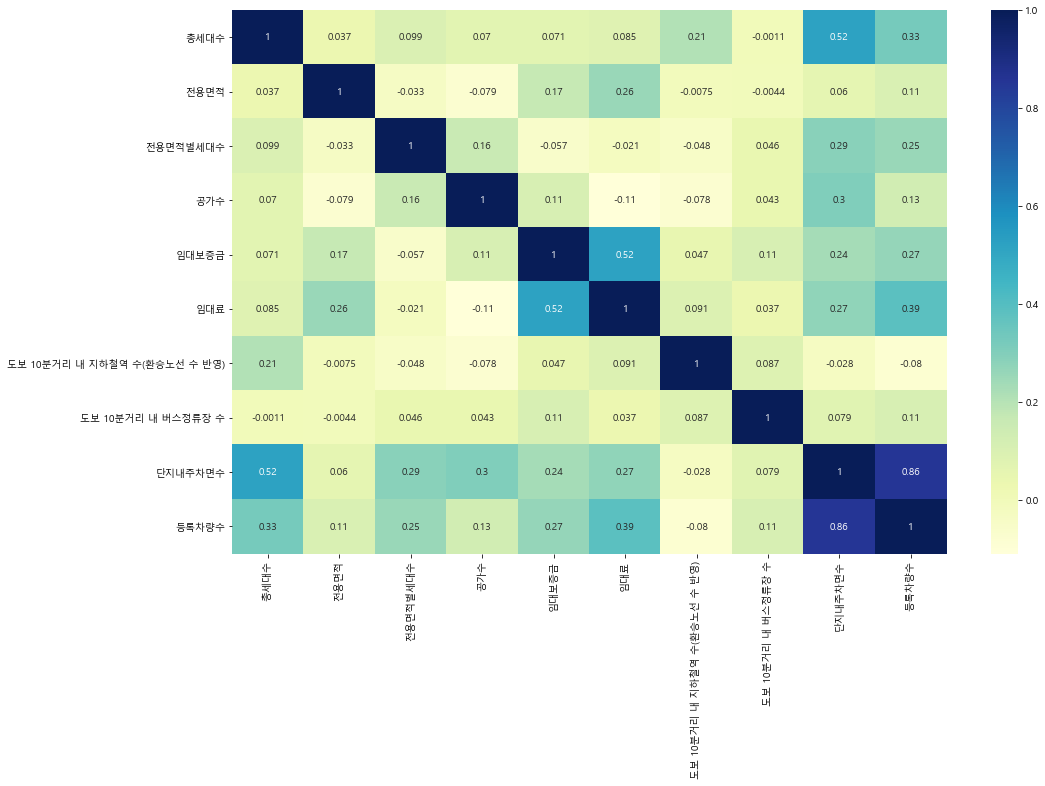

In [167]:
#히트맵 그려보기
#그래프 크기 설정
plt.figure(figsize=(16,10))

#히트맵 그리기
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')

plt.show()

#### 정규분포?를 확인해보기 위해서 건물구분, 지역, 공급유형, 자격유형, 단지코드 를 제외한 데이터 프레임을 따로 만든 후 확인

In [172]:
ex_train = train.drop(['임대건물구분','지역','공급유형','자격유형','단지코드'],axis=1)

In [168]:
from scipy.stats import norm 

IndexError: index 10 is out of bounds for axis 0 with size 10

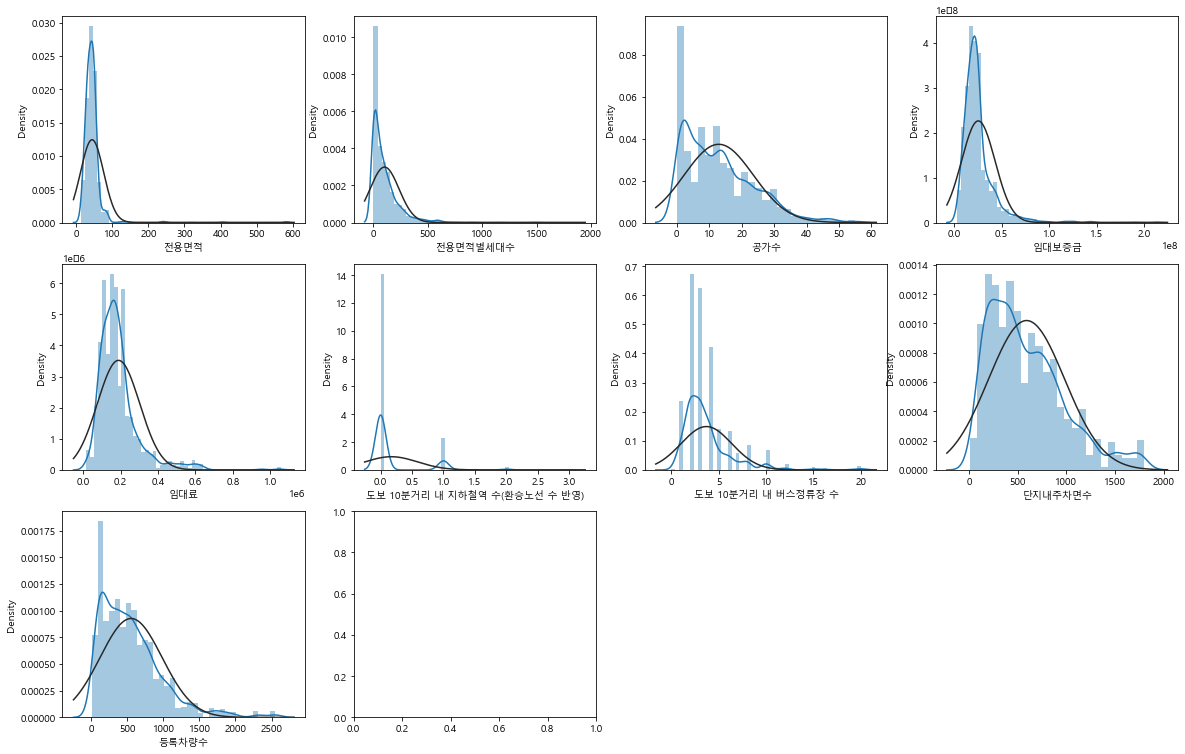

In [174]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,4,i)
    sns.distplot(ex_train[ex_train.columns[i]], fit=norm)
    

정규분포와 비슷한 모양을 가진 분포도 있고 아닌 것들도 있고...일단 여기까지! 2021.07.26

##### 선형 보간법, 중앙값으로 채워보았지만 0으로 채우는게 제일 이뻤음...

In [48]:
# train_file['임대보증금']=train_file['임대보증금'].fillna(0)
# train_file['임대보증금'].isnull().sum()

In [49]:
# train_file['임대료']=train_file['임대료'].fillna(0)
# train_file['임대료'].isnull().sum()

In [50]:
# train_file.isnull().sum()

In [51]:
# train_file.info()

In [52]:
# train_file.corr()

In [53]:
# #그래프에 한글표시하기
# from matplotlib import font_manager, rc
# import platform

# if platform.system() == 'Windows':
#     path = 'c:/Windows/Fonts/malgun.ttf'
#     font_name = font_manager.FontProperties(fname = path).get_name()
#     rc('font',family=font_name)
# elif platform.system()=='Darwin':
#     rc('font',family='ApplyGothic')
# else:
#     print('Check your OS')

In [54]:
# #히트맵 그려보기
# #그래프 크기 설정
# plt.figure(figsize=(16,10))

# #히트맵 그리기
# sns.heatmap(train_file.corr(), annot=True, cmap='YlGnBu')

# plt.show()

In [55]:
# train_file['임대보증금'].plot(kind='hist')

In [56]:
# train_file['임대료'].plot(kind='hist')

In [57]:
# green_diamond = dict(markerfacecolor='b', marker='D')
# plt.boxplot(train_file['임대보증금'], flierprops = green_diamond)
# plt.title('임대보증금')
# plt.show()

In [58]:
# #이상치 제거
# def removeOutlier(x, column):
#     q1 = x[column].quantile(0.25)
#     q3 = x[column].quantile(0.75)
    
#     IQR = 1.5*(q3-q1)
    
#     #원래 데이터 복제
#     y=x
    
#     y['임대보증금'][(train_file['임대보증금']>(q3+q1)) | (train_file['임대보증금']<(q1-IQR))] = None
#     y['임대보증금']
    
#     return(y)

In [59]:
# removeOutlier(train_file,'임대보증금').boxplot(column='임대보증금')
# plt.xticks(rotation=45)
# plt.show()

In [60]:
# green_diamond = dict(markerfacecolor='b', marker='D')
# plt.boxplot(train_file['임대료'], flierprops = green_diamond)
# plt.title('임대료')
# plt.show()

In [61]:
# #이상치 제거
# def removeOutlier(x, column):
#     q1 = x[column].quantile(0.25)
#     q3 = x[column].quantile(0.75)
    
#     IQR = 1.5*(q3-q1)
    
#     #원래 데이터 복제
#     y=x
    
#     y['임대료'][(train_file['임대료']>(q3+q1)) | (train_file['임대료']<(q1-IQR))] = None
#     y['임대료']
    
#     return(y)

In [62]:
# removeOutlier(train_file,'임대료').boxplot(column='임대료')
# plt.xticks(rotation=45)
# plt.show()

In [63]:
# train_file.isnull().sum()

In [64]:
# train_file.info()

In [65]:
# train_file['임대보증금'].plot(kind='hist')

In [66]:
# train_file['임대료'].plot(kind='hist')